In [30]:
with open('random_numbers.txt', 'r') as file:
    numbers = [int(line.strip()) for line in file]
    
smallest_number = min(numbers)
largest_number = max(numbers)
n = len(numbers)

print(f'Smallest number: {smallest_number}')
print(f'Largest number: {largest_number}')
print(f'Number of numbers: {n}')


Smallest number: 627
Largest number: 4294963381
Number of numbers: 2582632


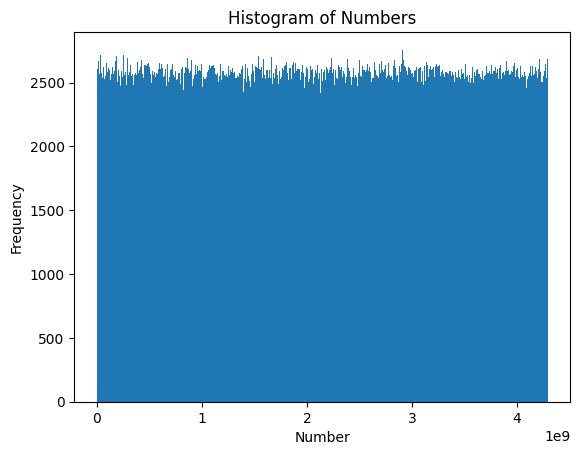

In [32]:
# Plot the histogram
import matplotlib.pyplot as plt

plt.hist(numbers, bins=1000)
plt.title('Histogram of Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()


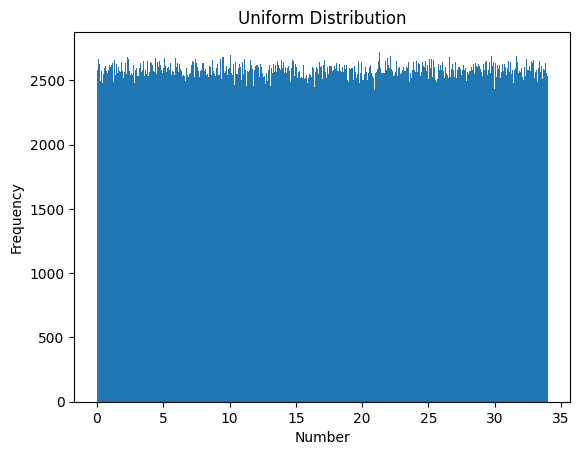

In [35]:
import numpy as np
from matplotlib import pyplot as plt

# Generate uniform distribution
uniform_dist = np.random.uniform(low=0, high=2^32, size=n)

# Plot the histogram of the uniform distribution
plt.hist(uniform_dist, bins=1000)
plt.title('Uniform Distribution')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

11250


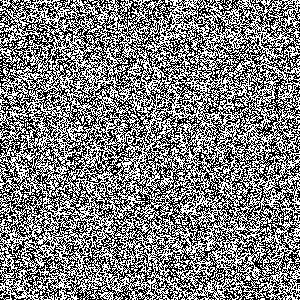

In [4]:
from PIL import Image
import random

width = 300
height = 300
total_pixels = width * height
total_bytes = total_pixels // 8 + (total_pixels % 8 > 0)
print(total_bytes)

def random_bitmap(width, height, zoom_factor):
    # Create a new image with the enlarged size
    img = Image.new('1', (width * zoom_factor, height * zoom_factor))
    
    # Calculate the total number of pixels
    total_pixels = width * height

    # Generate random bytes
    random_bytes = random.randbytes(total_pixels // 8 + (total_pixels % 8 > 0))

    # Convert the bytes to a bit array
    bit_array = [bool(int(b)) for b in bin(int.from_bytes(random_bytes, 'big'))[2:].zfill(total_pixels)]

    # Generate random pixels based on zoom factor
    bit_index = 0
    for y in range(height):
        for x in range(width):
            pixel_value = bit_array[bit_index]
            bit_index += 1
            # Set the pixels in the enlarged image
            for i in range(zoom_factor):
                for j in range(zoom_factor):
                    img.putpixel((x * zoom_factor + i, y * zoom_factor + j), pixel_value)
    return img


zoom_factor = 1
bitmap = random_bitmap(width, height, zoom_factor)
bitmap.show()  # Display the generated bitmap


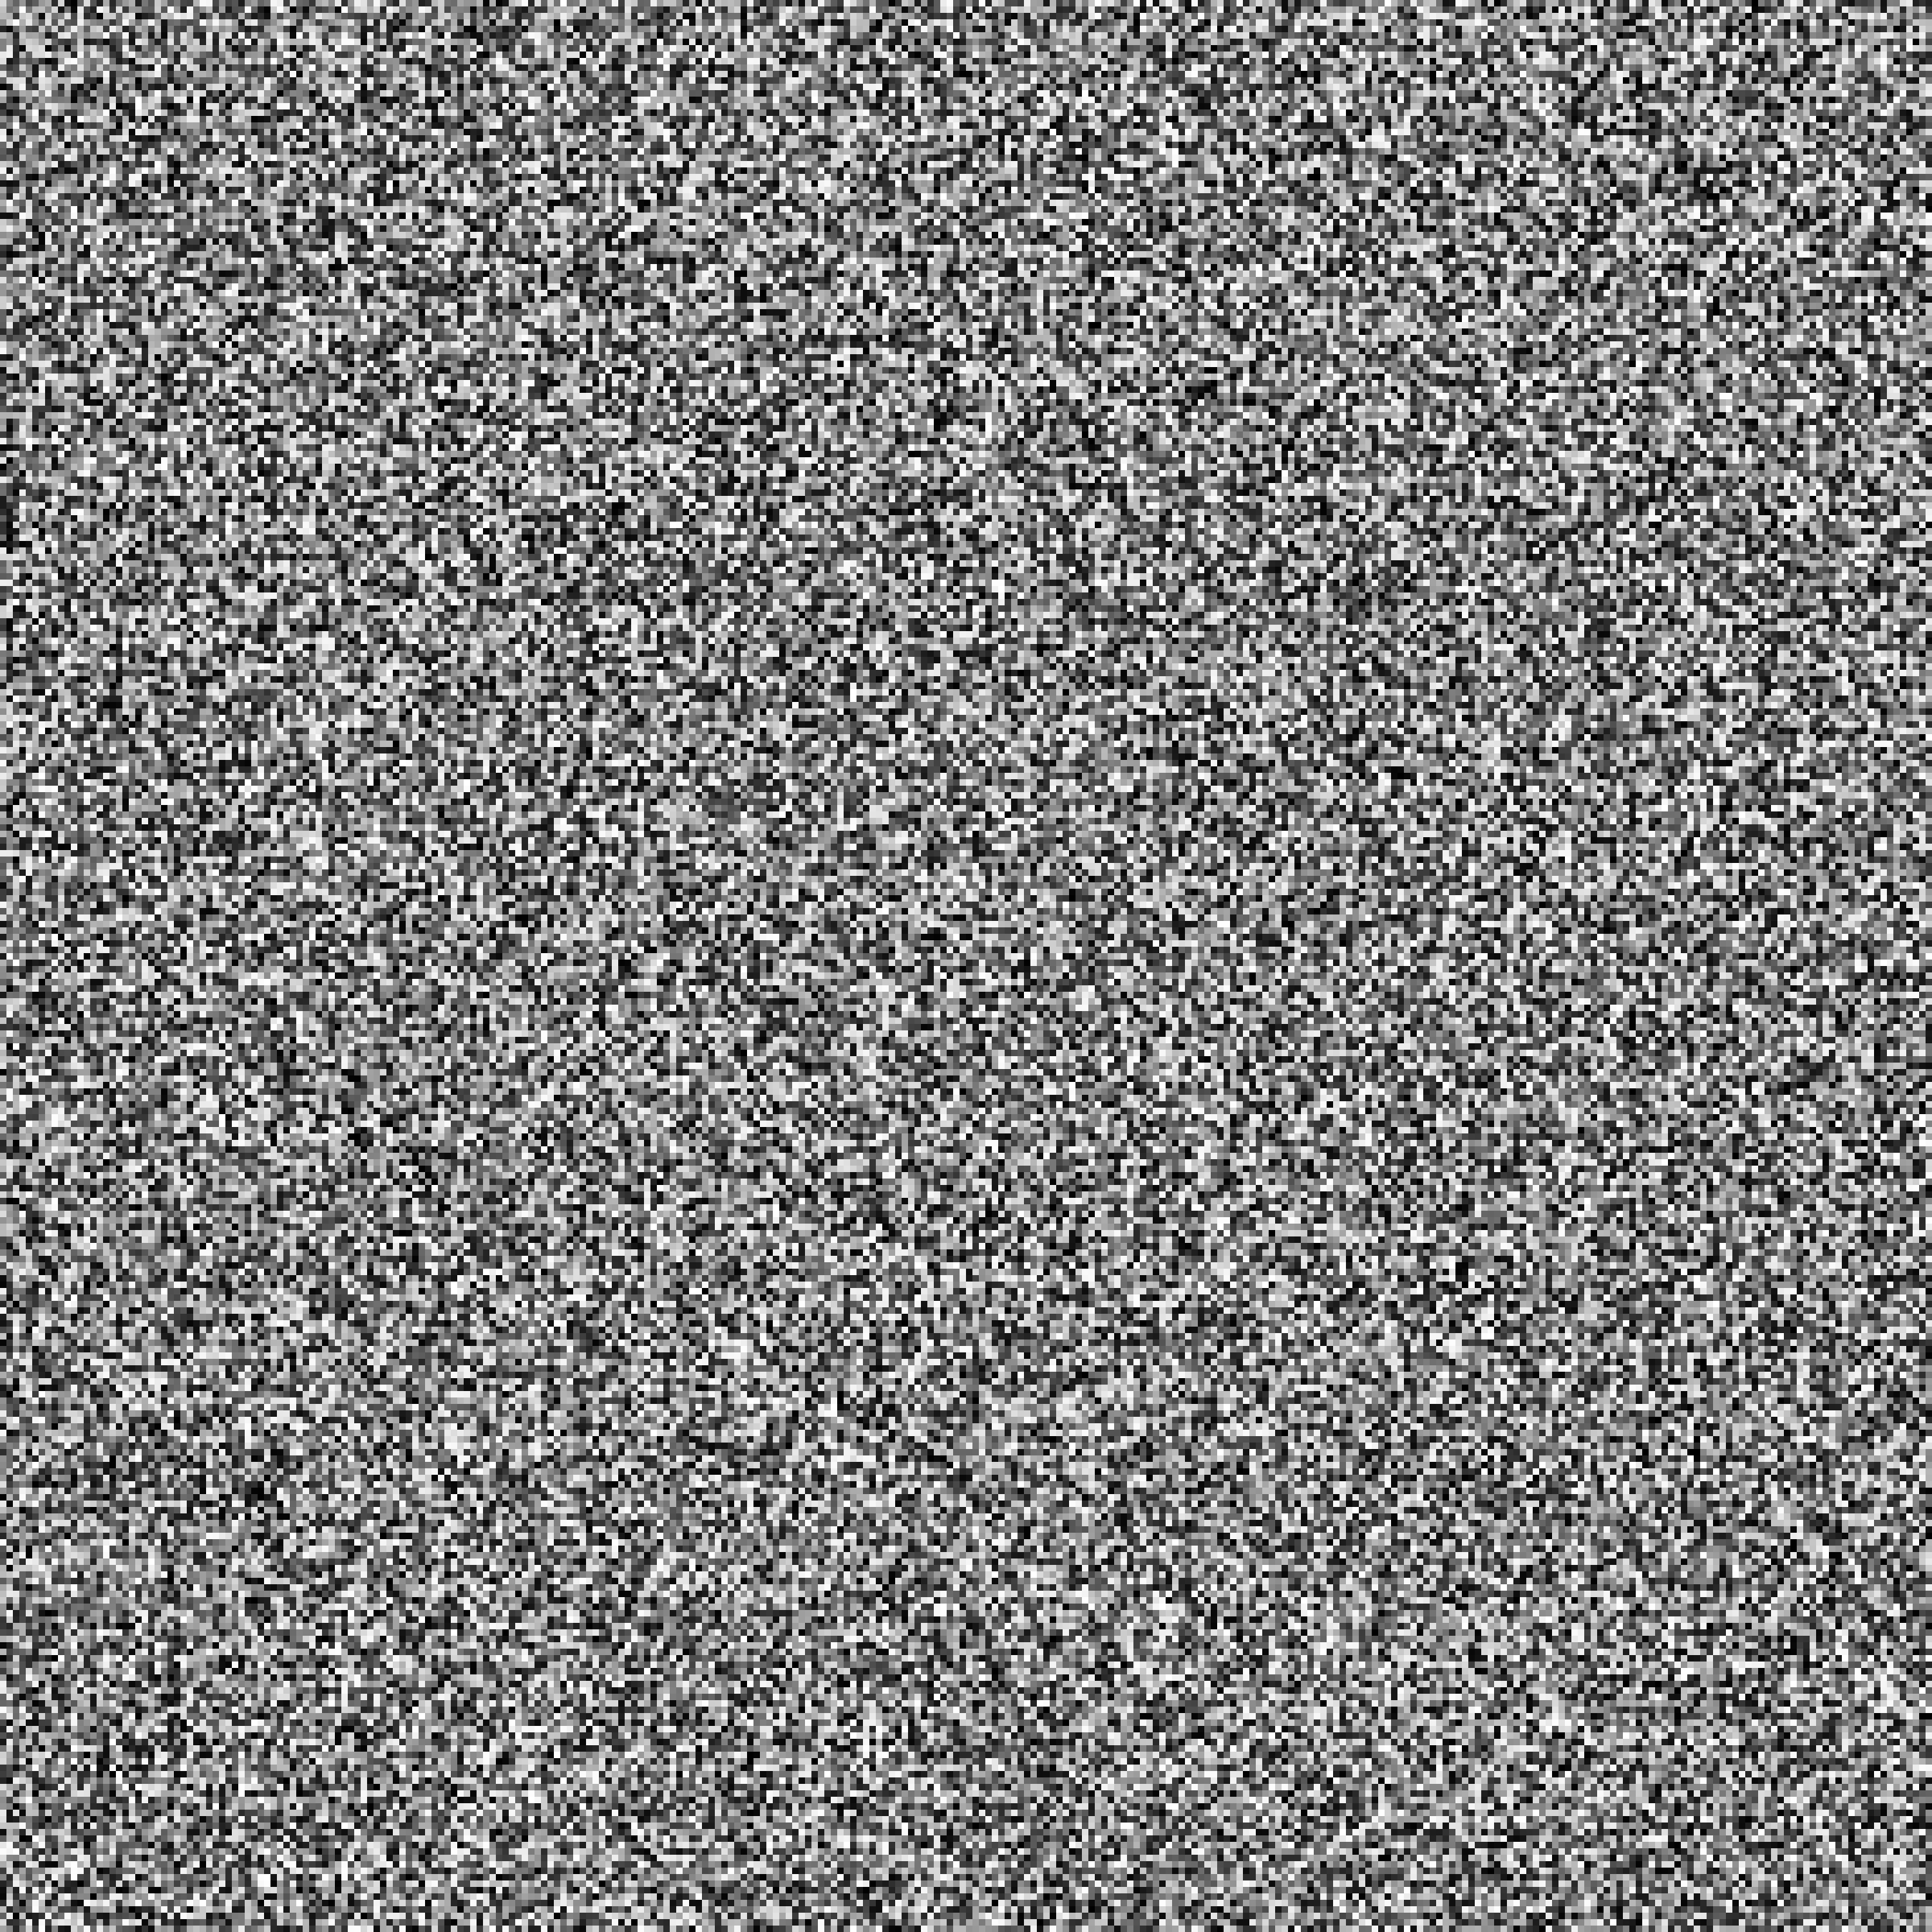

In [8]:
from PIL import Image
import random
import numpy as np
import numpy as np
from PIL import Image
import random

def get_grayscale_bitmap(width: int, height: int, zoom_factor: int) -> Image.Image:
    # Calculate the total number of pixels
    total_pixels = width * height

    # Generate random bytes
    byte_array = np.array([random.randint(0, 255) for _ in range(total_pixels)], dtype=np.uint8)

    # Reshape the byte array to match the image dimensions
    byte_array = byte_array.reshape((height, width))

    # Repeat the rows and columns based on the zoom factor
    byte_array = np.repeat(np.repeat(byte_array, zoom_factor, axis=0), zoom_factor, axis=1)

    # Create a new image from the byte array
    img = Image.fromarray(byte_array, mode='L')

    return img

width = 300
height = 300
zoom_factor = 1
bitmap = get_grayscale_bitmap(width, height, zoom_factor)
bitmap.show()  # Display the generated bitmap